# ADA - Homework 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Question 1: Word cloud

In [2]:
df = pd.read_csv("hillary-clinton-emails/Emails.csv")
df.sample(5)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
7835,7836,C05777504,H: LES GELB MAKES THE POINTS. SID,H,"Jiloty, Lauren C",116.0,2010-12-05T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0111/DOC_0C0...,F-2014-20439,...,NaN,"Jiloty, Lauren C <JilotyLC@state.gov>",NaN,"Sunday, December 5, 2010 7:15 PM",F-2014-20439,C05777504,08/31/2015,RELEASE IN PART,NaN,UNCLASSIFIED U.S. Department of State Case No....
235,236,C05739835,"MINI FOR TODAY-MONDAY, NOV 26, 2012",H,"Coleman, Claire L",38.0,2012-11-26T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH3/DOC_0C05739835...,F-2015-04841,...,NaN,"Coleman, Claire L <ColemanCL@state.gov›","Hum Abedin; Abediri, Huma;",NaN,F-2015-04841,C05739835,05/13/2015,RELEASE IN PART,"Hanley, Monica R; Vairnoro, B6\n7:30 am PHONE ...",UNCLASSIFIED\nU.S. Department of State\nCase N...
4288,4289,C05767784,ROY SPENCE,H,"McHale, Judith A",105.0,2010-01-11T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0057/DOC_0C0...,F-2014-20439,...,H,"McHale, Judith A <McHaleJA@state.gov>","Mills, Cheryl D","Monday, January 11, 2010 11:53 AM",F-2014-20439,C05767784,08/31/2015,RELEASE IN FULL,"As per your suggestion, I spoke with Roy Spenc...",UNCLASSIFIED U.S. Department of State Case No....
6359,6360,C05771970,CALL: WESTERWELLE,H,"Jiloty, Lauren C",116.0,2010-08-30T04:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0095/DOC_0C0...,F-2014-20439,...,NaN,"Jiloty, Lauren C <JilotyLC@state.gov>","Abedin, Huma","Monday, August 30, 2010 9:18 AM",F-2014-20439,C05771970,08/31/2015,RELEASE IN FULL,"MS,\nWesterwelle has a call into you. He would...",UNCLASSIFIED U.S. Department of State Case No....
3367,3368,C05765906,DRAFT TESTIMONY WARTIME CONTRACTING COMMISSION...,NaN,"Kennedy, Patrick F",163.0,2009-09-13T04:00:00+00:00,2015-07-31T04:00:00+00:00,DOCUMENTS/HRCEmail_JulyWeb/Web_038-039/DOC_0C0...,F-2014-20439,...,NaN,NaN,NaN,NaN,F-2014-20439,C05765906,07/31/2015,RELEASE IN PART,NaN,UNCLASSIFIED U.S. Department of State Case No....


In order to prepare the data for the word cloud, we keep only two columns of the dataframe:
- `MetadataSubject` which corresponds to the email subjects
- `RawText` which corresponds to the email contents

In [3]:
subjects = df.MetadataSubject.str.cat(sep=" ")
contents = df.RawText.str.cat(sep=" ")
text = subjects + " " + contents

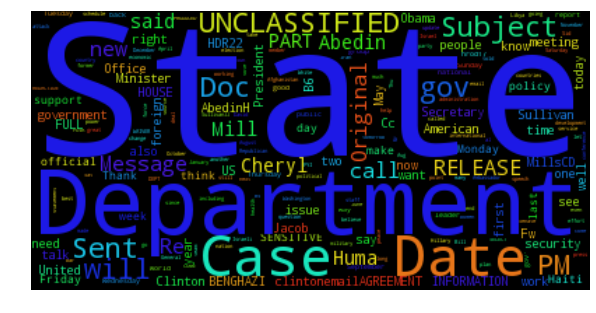

In [4]:
from wordcloud import WordCloud

word_cloud = WordCloud().generate(text)

plt.figure(figsize=(10, 15))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [5]:
from stop_words import get_stop_words
from nltk.tokenize import RegexpTokenizer
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def process_text(text):
    # Tokenize the words
    words = RegexpTokenizer(r'\w+').tokenize(text.lower())
    
    # Remove the stopwords
    no_stop_words = [w for w in words if w not in get_stop_words('en')]
    
    # Stem words
    stemmed_words = [stemmer.stem(w) for w in no_stop_words]

    # Lemmatize the words
    lemmatized_words = [lemmatizer.lemmatize(w) for w in stemmed_words]

    return lemmatized_words

In [6]:
clean_text = ' '.join(process_text(text))

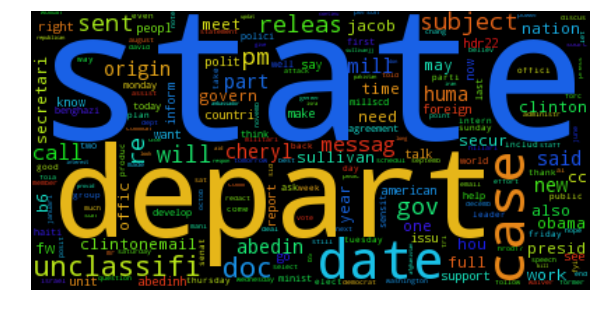

In [7]:
word_cloud = WordCloud().generate(clean_text)

plt.figure(figsize=(10, 15))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

## Question 2: Countries

Let's store in a dictionary which mail refers to which country

In [8]:
from pycountry import countries

discussed_countries = {}

for _, email in df.iterrows():
    for word in RegexpTokenizer(r'\w+').tokenize(email.RawText):
        try:
            country = countries.get(name=word)
        except:
            continue
        
        if country.name not in discussed_countries:
            discussed_countries[country.name] = set()
        
        discussed_countries[country.name].add(email.Id)

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

email_polarities = {}
analyzer = SentimentIntensityAnalyzer()

for _, email in df.iterrows():
    email_polarities[email.Id] = analyzer.polarity_scores(email.RawText)

/Users/vfaramond/anaconda/lib/python3.5/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [13]:
countries_polarities = []
for country, emails in discussed_countries.items():
    for email in emails:
        polarity = email_polarities[email]['compound']
        countries_polarities.append([country, polarity])
        
df_polarities = pd.DataFrame(countries_polarities, columns=['Country', 'Polarity'])

df_polarities_sorted = df_polarities.groupby('Country').mean().sort_values(by='Polarity')

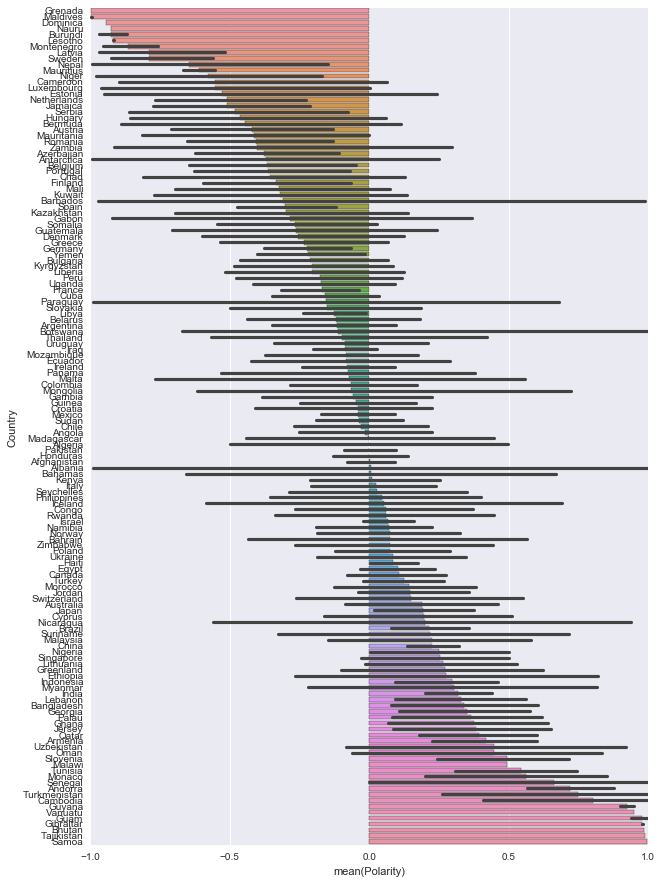

In [14]:
plt.figure(figsize=(10, 15))

sns.barplot(x='Polarity', 
            y='Country', 
            data=df_polarities,
           order=df_polarities_sorted.index)
plt.show()

## Question 3: Topic modeling

In [17]:
import gensim
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

/Users/vfaramond/anaconda/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [18]:
emails_tokens = [process_text(email.RawText) for _, email in df.iterrows()]
emails_corpus = Dictionary(emails_tokens)

In [19]:
emails_vectors = [emails_corpus.doc2bow(tokens) for tokens in emails_tokens]

In [20]:
emails_lda = LdaModel(emails_vectors, num_topics=50, id2word=emails_corpus)

In [21]:
for i in range(emails_lda.num_topics):
    text = " ".join([word for word, _ in emails_lda.show_topic(i)])
    print(i, " => " , text)

0  =>  s u state hospit woman africa clinton depart work 2015
1  =>  s bower ok state 2015 u depart case windrush lp
2  =>  haiti s child 08 bank million haitian http u fund
3  =>  2010 haiti state s r senat januari amcit hold verma
4  =>  reid saudi iranian pan s senat vote state iran king
5  =>  state s u depart doc 20439 2014 date o case
6  =>  s state u will doc unclassifi date depart f 20439
7  =>  monterrey s state minist c05771329 c05773349 hungarian prime codex bajnai
8  =>  http s 2010 lib www disc unfavor u 1 depart
9  =>  s state depart 2015 u case f unclassifi date doc
10  =>  s state u case will depart f 2015 unclassifi doc
11  =>  2010 u s 08 http state com 20439 depart doc
12  =>  s state u depart case 2015 govern doc f unclassifi
13  =>  s state u depart date 1 doc 2015 case unclassifi
14  =>  s state u 2015 date doc depart unclassifi will 2014
15  =>  state s u bbc 2015 iraqi depart date f case
16  =>  2010 north s korea march u state 2015 subject sent
17  =>  s boehne